In [1]:
from src.clustering.run import run_clusters, load_config, get_cluster
from src.reachability_analysis.labeling_oracle import LabelingOracleSINDData
from src.clustering.Labels import run_labels, plot_dual_pca_3d, plot_dual_tsne_3d
import os

In [8]:
load_embeddings = True

In [11]:
RERUN = False
min_samples=30
model_file = 'SINDDataset_pretrained_2024-04-27_00-11-45_KIP'
index=2
index_data=0
folder='experiments'

### Create Clusters

In [12]:
load_embeddings, min_samples, RERUN

(False, 30, False)

In [13]:
config = load_config(folder=folder, model_file=model_file, index=index, index_data=index_data)
config["remove_noise"] = True
if RERUN: run_clusters(config=config, load_embeddings=load_embeddings, load_clusters=False, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)
clusters1, embeddings, target, padding_masks = run_clusters(config=config, load_embeddings=True, load_clusters=True, show_clusters=False,min_cluster_size = 5, min_samples = min_samples)

Silhouette Score: 0.5331334471702576, num_clusters: 60


In [18]:
config_original = config.copy()
config_original["original_data"] = True
if RERUN: run_clusters(config=config_original, load_embeddings=load_embeddings, load_clusters=False, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)
clusters2, embeddings, target, padding_masks = run_clusters(config=config_original, load_embeddings=True, load_clusters=True, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)

Silhouette Score: 0.48794238801005047, num_clusters: 43


In [20]:
config["data_chunk_len"], embeddings.shape

(50, (10098, 50, 128))

In [ ]:
# plot_dual_tsne_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]))

In [21]:
clusters2[clusters2==-1].sum(), len(clusters2), clusters1[clusters1==-1].sum(), len(clusters1)

(-6353, 10412, -7290, 10412)

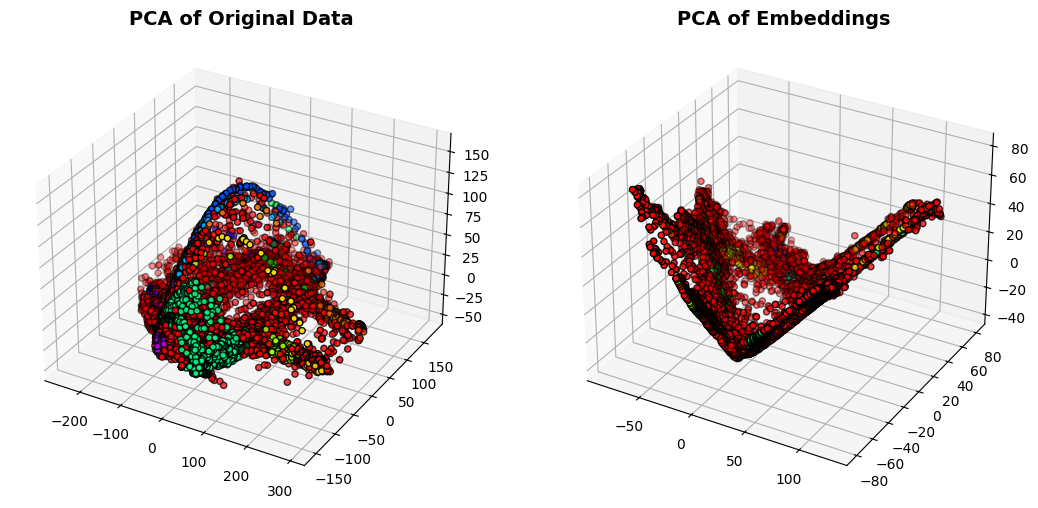

In [22]:
plot_dual_pca_3d((target, clusters2), (embeddings, clusters1), file=config["output_dir"]+"/clusters/pca_plot_initial")

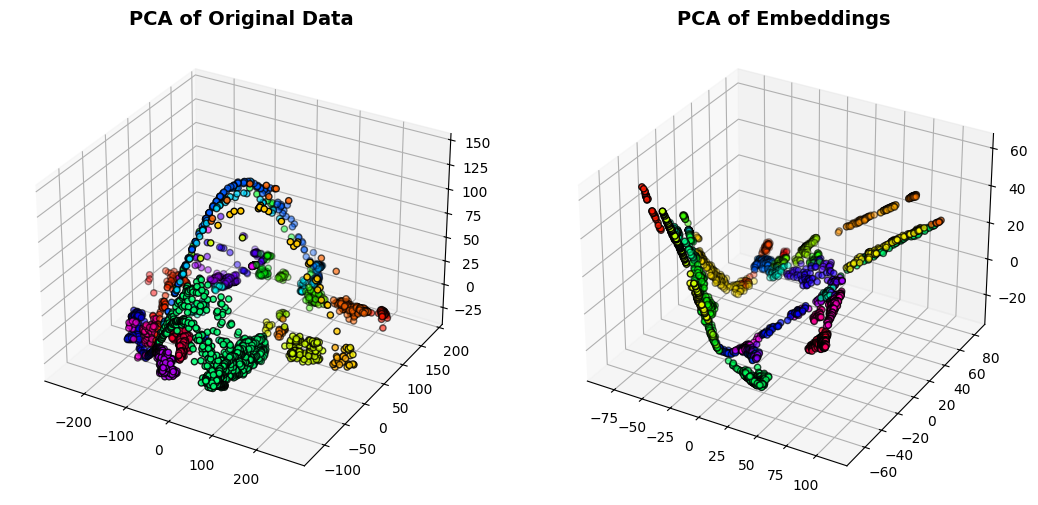

In [23]:
plot_dual_pca_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]), file=config["output_dir"]+"/clusters/pca_plot")

In [24]:
config["original_data"], config_original["original_data"]

(False, True)

(10098, 50, 6) (10098, 50, 6) (10098, 50, 128) (10098, 50, 128) (10098, 50, 6) (10098, 50)
Silhouette Score: 0.5532127618789673, num_clusters: 58


2024-08-04 16:53:46,480 | INFO : Loading 23 datasets files using 20 parallel processes ...
Labeling data: 100%|██████████| 10098/10098 [00:02<00:00, 4730.38it/s]
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the cons

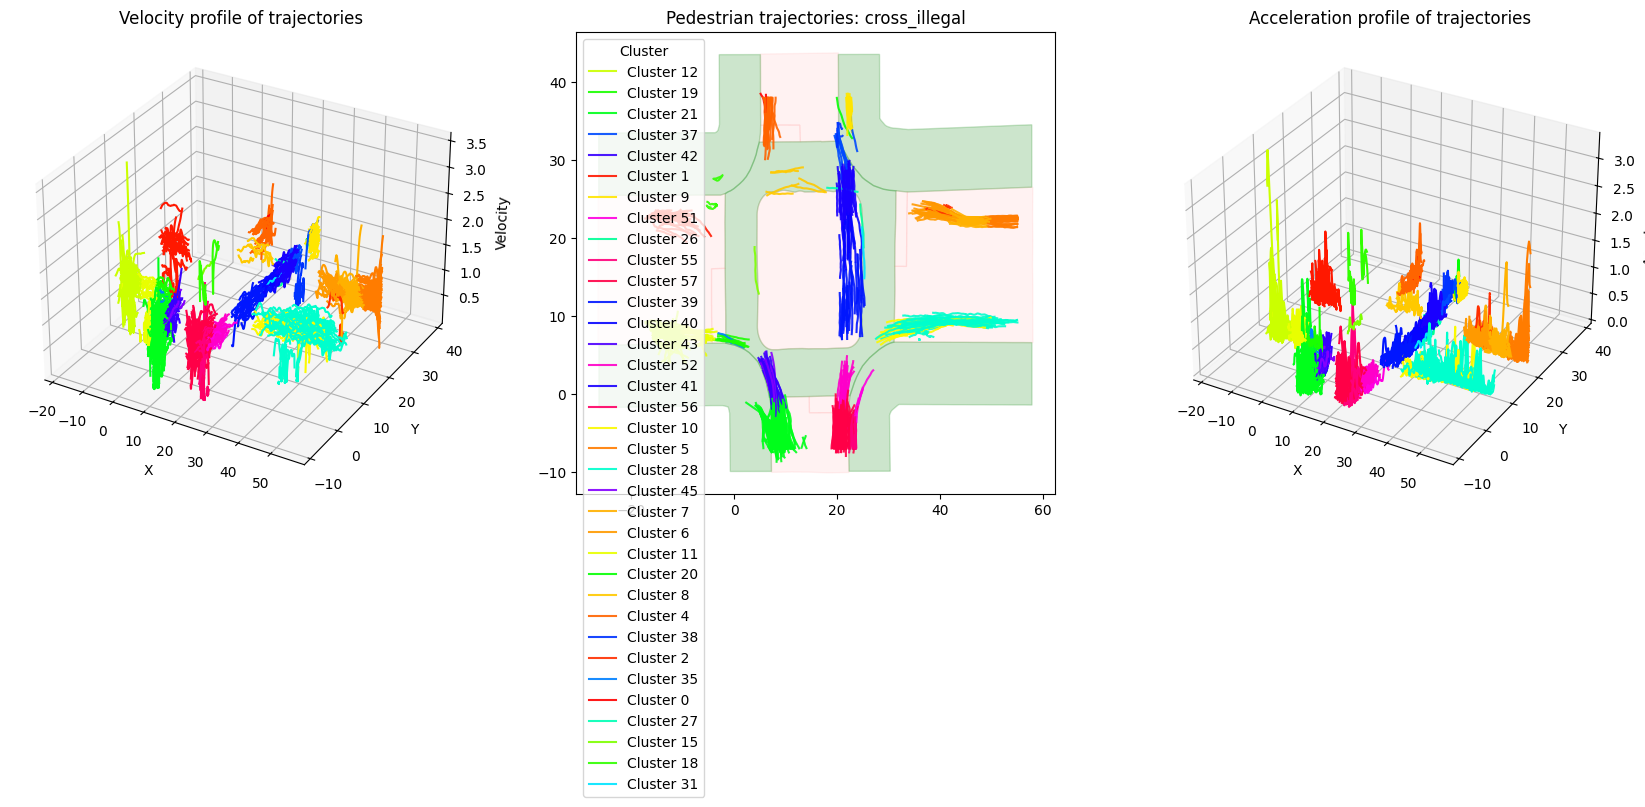

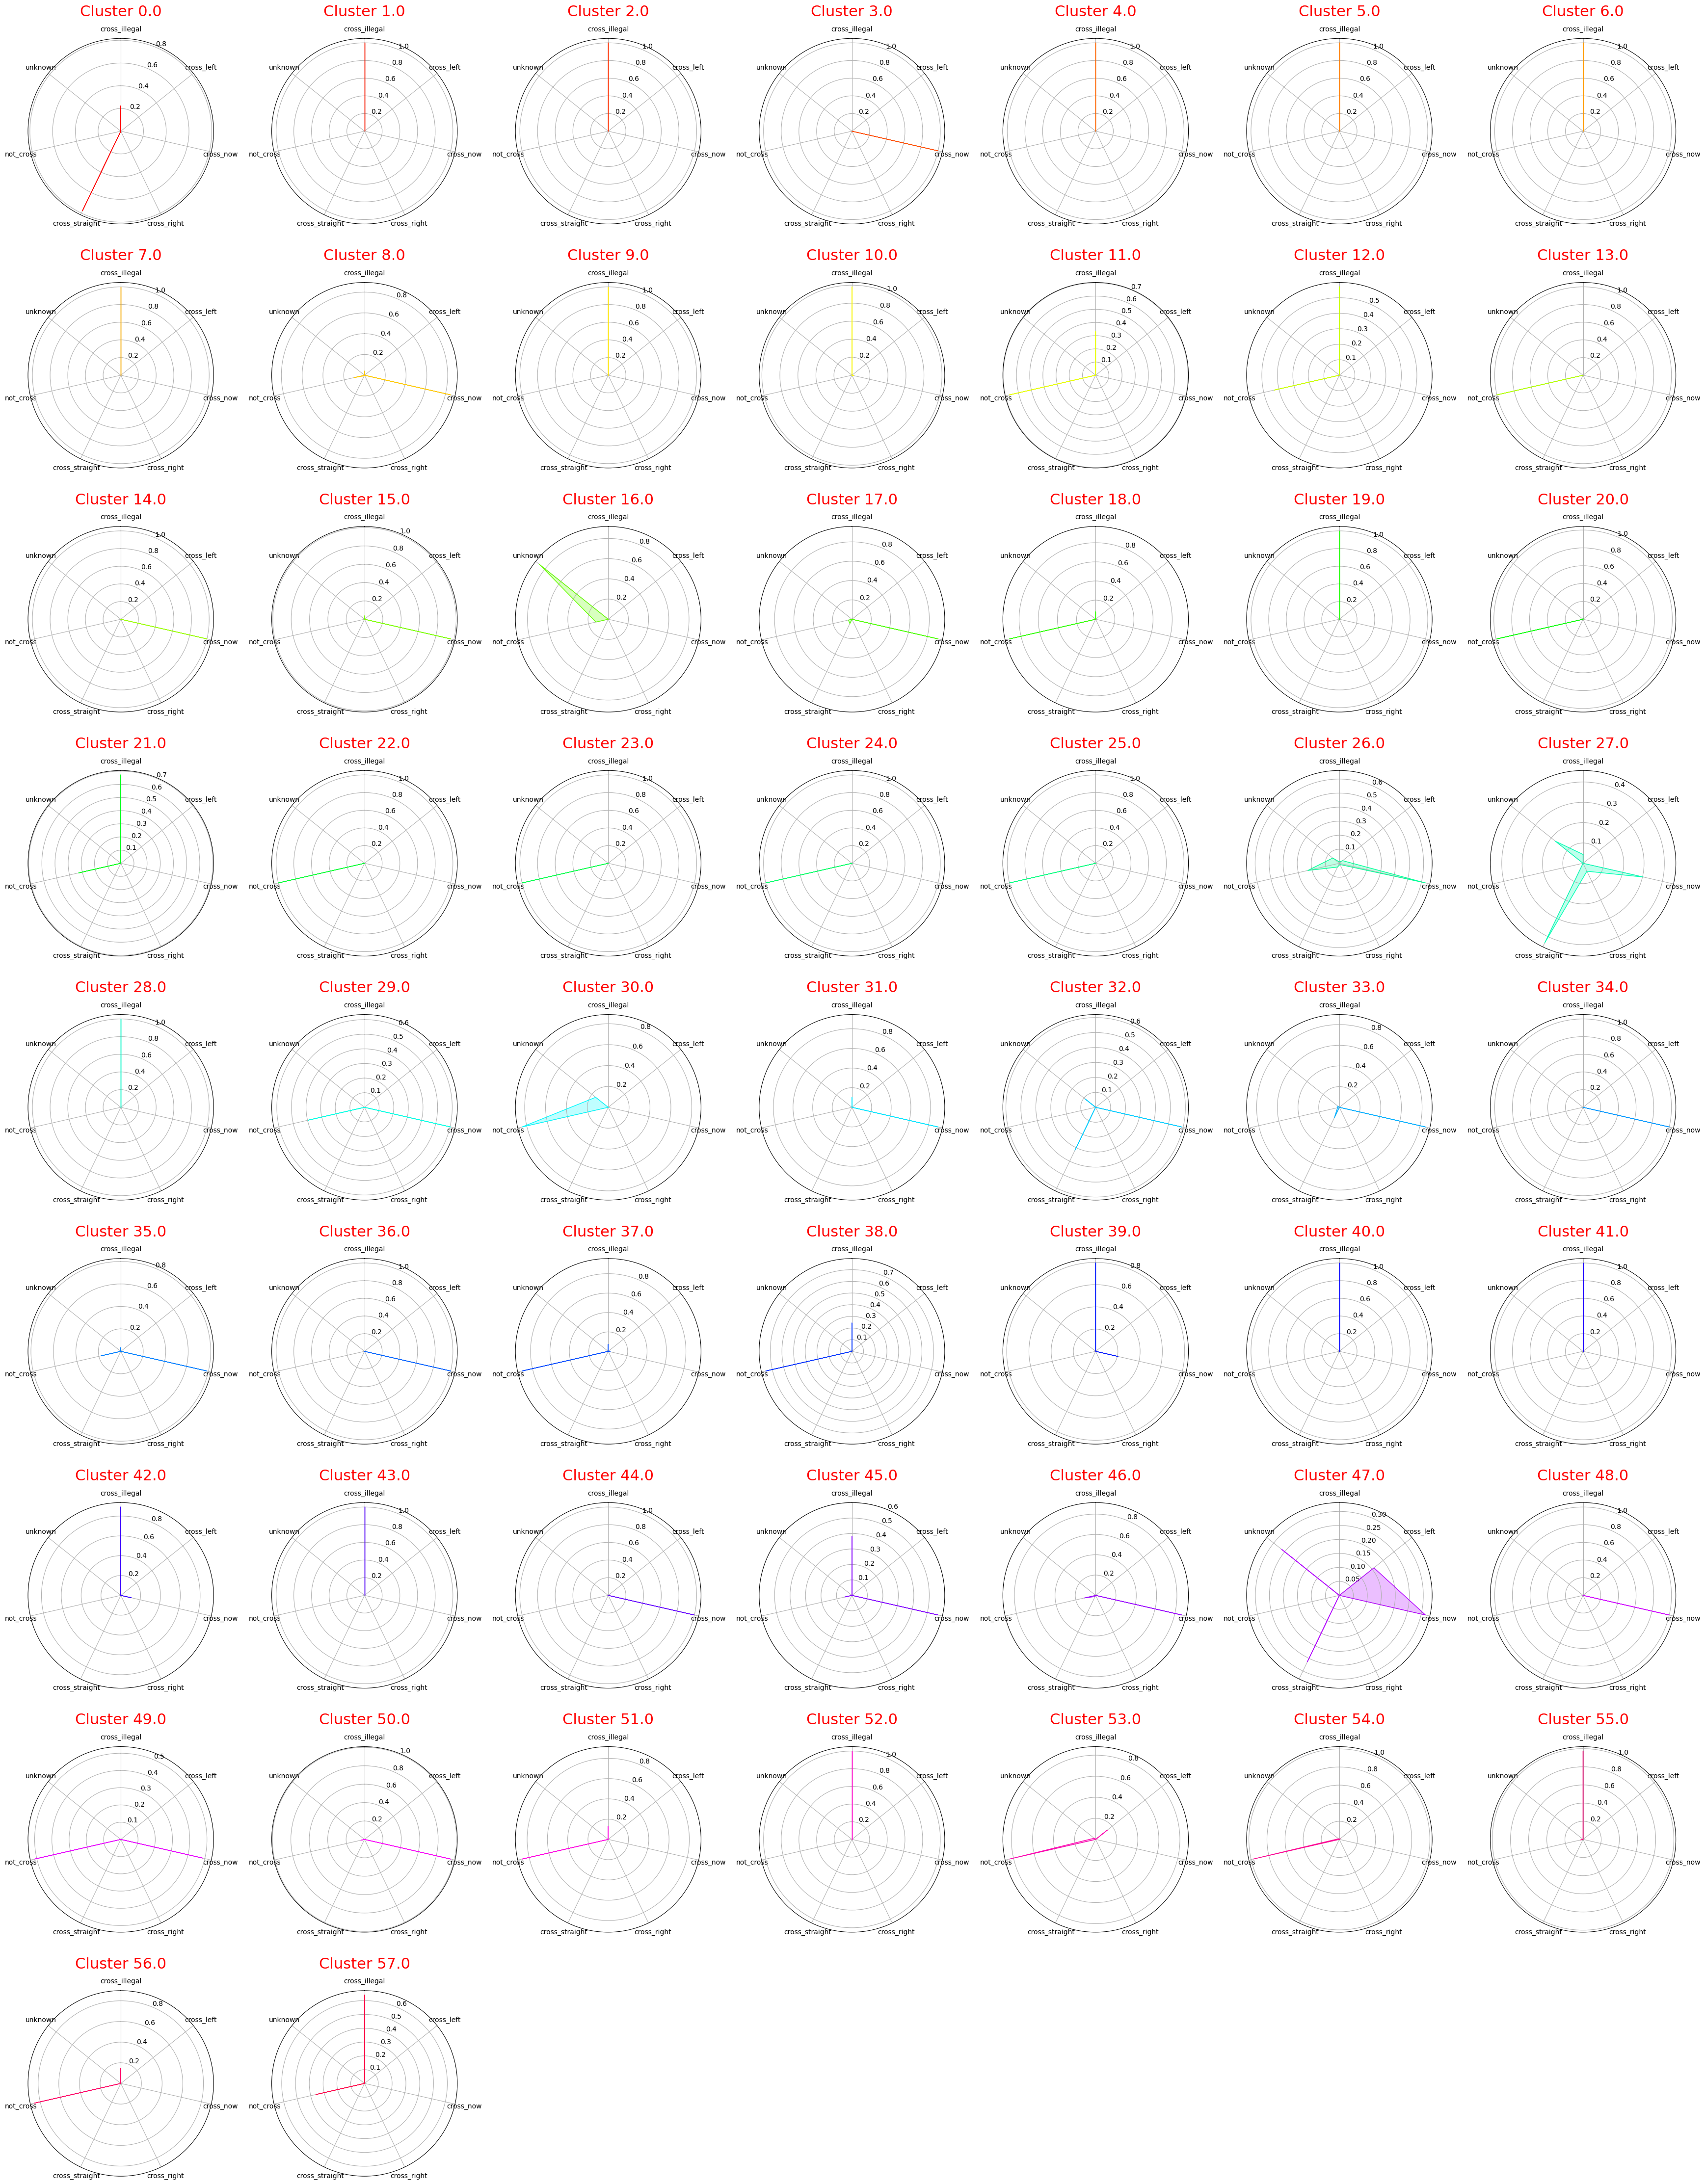

In [25]:
run_labels(config, remove_noise=True)

Get Cluster ID

In [26]:
ROOT_RESOURCES = os.getcwd() + "/resources"

In [36]:
config_test = config.copy()
config_test['data_dir'] = ROOT_RESOURCES + '/test/cross_illegal'
test_labeling_oracle = LabelingOracleSINDData(config_test)
test_labeling_oracle.load_data()

2024-08-04 16:56:17,347 | INFO : Loading 1 datasets files using 1 parallel processes ...


In [39]:
c, distance = get_cluster(config_test, data_oracle=test_labeling_oracle)
c, distance

/home/kfragkedaki/miniconda3/envs/pedestrian_project/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2024-06-24 13:26:30,944 | INFO : Model:
TSTransformerEncoder(
  (project_inp): Linear(in_features=6, out_features=128, bias=True)
  (pos_enc): LearnablePositionalEncoding(
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerBatchNormEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (li

Loaded model from /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/checkpoints/model_best.pth. Epoch: 28
Evaluating   0.0% | batch:         0 of         1	|	loss: 0.108453
Load data from: /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters
Load Annoy Model from: /home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval/clusters/annoy_index.ann


34

### Plot Training Validation Loss

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from src.clustering.run import load_config

In [41]:
# sns.set_theme("notebook")

In [42]:
config = load_config(model_file=model_file, index=index, index_data=index_data, folder=folder)

In [43]:
# Load the cost data
if os.path.exists(f'{config["output_dir"]}/loss_train.csv') and os.path.exists(f'{config["output_dir"]}/loss_val.csv'):
    df_cost_train = pd.read_csv(f'{config["output_dir"]}/loss_train.csv')
    df_cost_val = pd.read_csv(f'{config["output_dir"]}/loss_val.csv')
    df_cost_train['DataType'] = 'Training'
    df_cost_val['DataType'] = 'Validation'
    # Concatenate the dataframes
    df = pd.concat([df_cost_train, df_cost_val[1:]]).reset_index()
    df['Epoch'] = df['Step']
else:
    df = pd.DataFrame([], columns=['Step', 'Value', 'DataType', 'Epoch'])

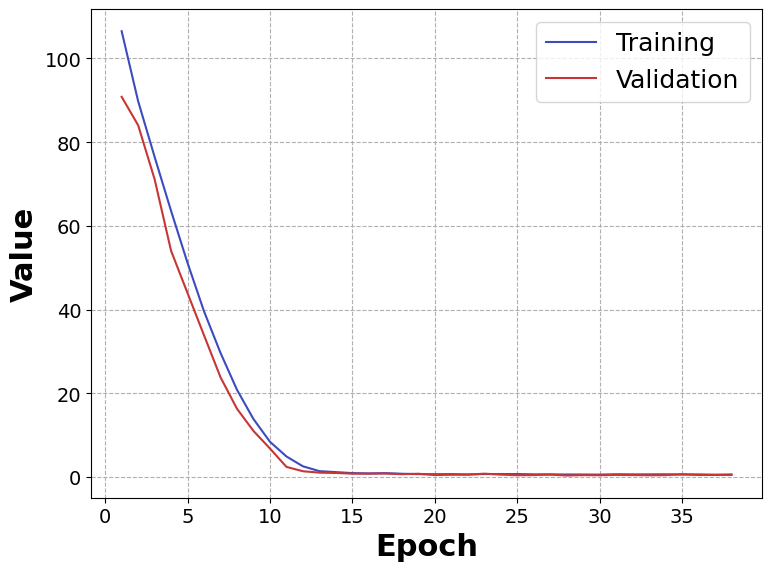

In [44]:
#  Create the plot
plt.figure(figsize=(8, 6))
colors = plt.cm.coolwarm(np.linspace(0, 1, 20))
plt.rcParams.update({"font.size": 16})

# Plot using seaborn with Step on a log scale
ax = sns.lineplot(x='Epoch', y='Value', hue='DataType', palette=[colors[0], colors[18]], data=df)

ax.grid(which="major", ls="--",)
ax.grid(which="minor", ls="--", linewidth=0.33)

# Adjust the label size
plt.xlabel('Epoch', fontweight="bold", fontsize="22")
plt.ylabel('Value', fontweight="bold", fontsize="22")

# Adjust the ticklabel sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust the title size
# plt.title('Training vs Validation Loss \n', size=20)

# Adjust the legend text size
plt.legend(fontsize='18')

plt.tight_layout()
# The file will be saved at the specified location, the path needs to be adjusted to your file system
plt.savefig(f"resources/test/plot_validation_training_cost.png", dpi=300, bbox_inches='tight')
plt.show()